Data extracted to: ['test', 'train']
Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


C:\Users\ay569\OneDrive\Desktop\Tesnerflow\tfvenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\ay569\OneDrive\Desktop\Tesnerflow\tfvenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 16s 955ms/step - accuracy: 0.4814 - loss: 1.4776 - val_accuracy: 0.4273 - val_loss: 0.6978
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 566ms/step - accuracy: 0.5211 - loss: 0.6944 - val_accuracy: 0.5455 - val_loss: 0.6939
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 584ms/step - accuracy: 0.5357 - loss: 0.6871 - val_accuracy: 0.5000 - val_loss: 0.7271
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 751ms/step - accuracy: 0.5495 - loss: 0.6915 - val_accuracy: 0.5091 - val_loss: 0.7180
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 727ms/step - accuracy: 0.6228 - loss: 0.6385 - val_accuracy: 0.5000 - val_loss: 0.7464
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 637ms/step - accuracy: 0.6842 - loss: 0.5909 - val_accuracy: 0.5636 - val_loss: 0.6991
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 645ms/step - accuracy: 0.7602 - loss: 0.4863 - val_accuracy: 0.5273 - val_loss: 0.8685
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 666ms/step - accuracy: 0.8266 - loss: 0.4143 - val_accuracy

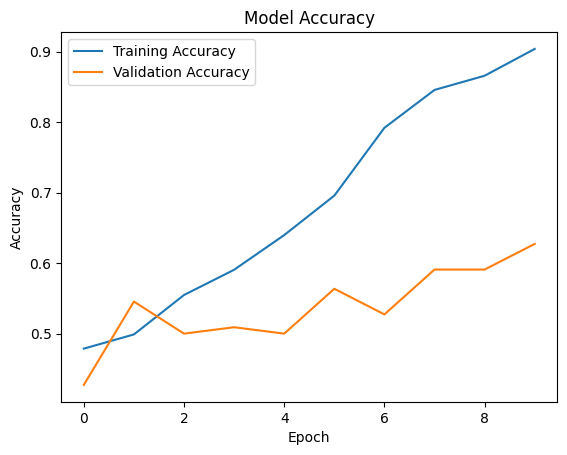

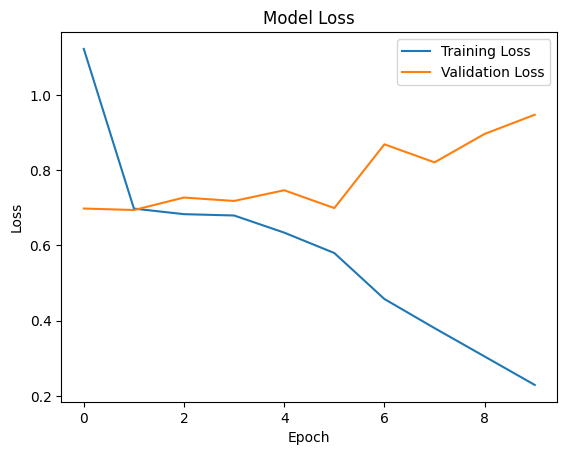

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


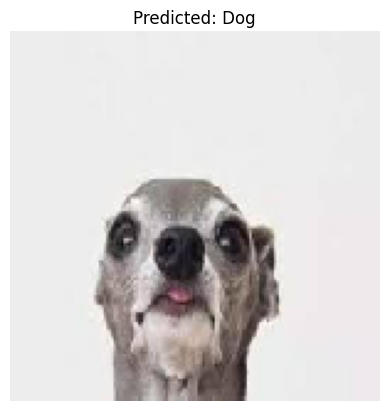

In [2]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import zipfile
import os

# Step 2: Unzip the Dataset
import shutil
zip_path = "D:\Codetech project\catdog.zip"  # path in the environment
extract_path = '/mnt/data/catdog_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
print("Data extracted to:", os.listdir(extract_path))

# Step 3: Prepare Data Generators
train_dir = os.path.join(extract_path, 'train') if 'train' in os.listdir(extract_path) else extract_path

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Step 4: Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Step 6: Visualize Accuracy & Loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 7: Test Sample Prediction
import numpy as np
for images, labels in val_generator:
    sample_img = images[0]
    plt.imshow(sample_img)
    pred = model.predict(sample_img.reshape(1, 150, 150, 3))
    plt.title(f"Predicted: {'Dog' if pred[0][0]>0.5 else 'Cat'}")
    plt.axis('off')
    plt.show()
    break
